In [15]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from models.clustering.kmeans import KMeans
from sklearn.metrics import davies_bouldin_score
from models.pca.pca import pca

warnings.filterwarnings('ignore')

Questao 1

In [5]:
X = np.genfromtxt('./quake.csv', delimiter=',')
X = MinMaxScaler().fit_transform(X)

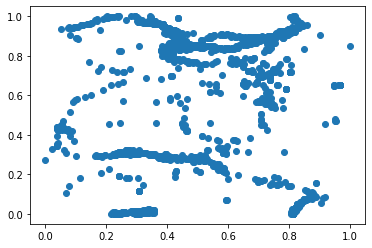

In [6]:
plt.scatter(X[:, 0], X[:, 1])

In [7]:
def runKmeans(distance):
    k_result = []
    for K in np.arange(4, 21):
        kmeans_runs = []
        for _ in range(0, 21):
            kmeans = KMeans(K=K, plot_steps=False, distance=distance)
            labels = kmeans.predict(X)
            kmeans_runs.append([davies_bouldin_score(X, labels), labels])

        kmeans_runs = np.array(kmeans_runs)
        idx = np.argmin(kmeans_runs[:, 0])
        k_result.append([K, kmeans_runs[idx, 0]])

    return np.array(k_result)

Questão 1 - A

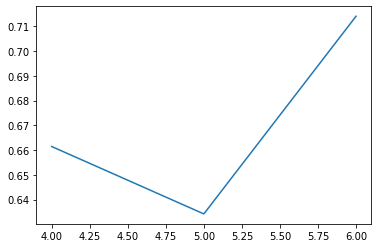

In [13]:
result = runKmeans("euclidean")
plt.plot(result[:,0], result[:,1])

Questão 1 - B

In [ ]:
result = runKmeans("mahalanobis")
plt.plot(result[:,0], result[:,1])

Questão 2

In [30]:
df = np.genfromtxt('./penguins.csv', delimiter=',')
X = df[:, :-1]
y = df[:, -1]

In [44]:
def pca_plot(n):
    x,y,evals,evecs = pca(X, n)
    plt.figure()
    plt.plot(y[:,0],y[:,1],'.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Reconstructed data after PCA')
    plt.show()

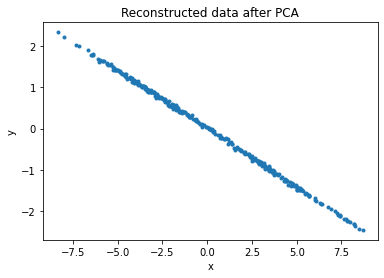

In [47]:
pca_plot(2)

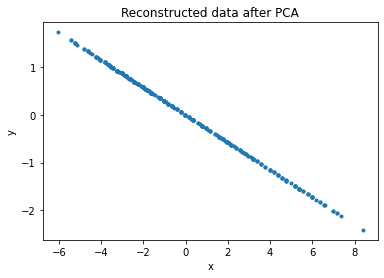

In [48]:
pca_plot(1)

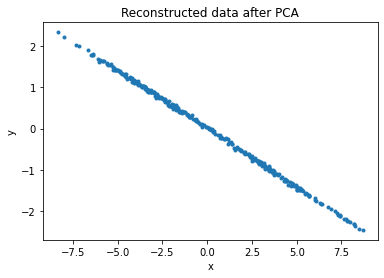

In [49]:
pca_plot(2)

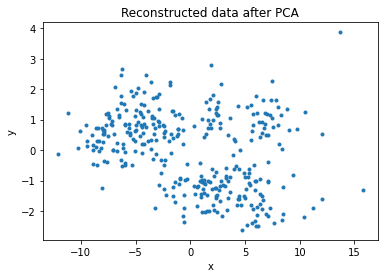

In [50]:
pca_plot(3)

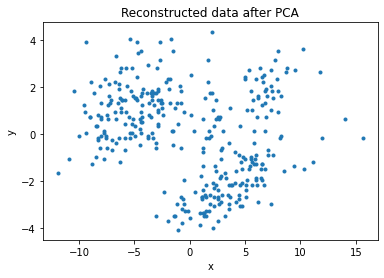

In [51]:
pca_plot(4)